In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import pearsonr

In [35]:
true = np.random.normal(loc=np.random.randint(5,10,100))
dis2p=true+np.random.normal(loc=0, scale=0.5, size=100)

control = true + np.random.normal(loc=0, scale=0.5, size=100)
control[np.random.randint(0,len(control), size=10)] += 1.5

biolord = control + (true-control)*0.5 + np.random.normal(loc=0, scale=0.5, size=100)

print(pearsonr(control, true))
print(pearsonr(dis2p, true))
print(pearsonr(biolord, true))

(0.9524417230299477, 2.230194243187734e-52)
(0.9596996355945632, 7.945806031466163e-56)
(0.9438113144230896, 6.4069155897513415e-49)


In [36]:
delta_dis2p = dis2p - control
delta_biolord = biolord - control
delta_true = true - control
print(pearsonr(delta_dis2p, delta_true))
print(pearsonr(delta_biolord, delta_true))

(0.7654424298349566, 1.804413686612006e-20)
(0.3758780363479713, 0.00011627817808096875)


In [70]:
true = np.random.normal(loc=np.random.randint(5,10,100))
dis2p=true+np.random.normal(loc=0, scale=0.5, size=100)

control = [1+i for i in dis2p]

biolord = control + (true-control)*0.5 + np.random.normal(loc=0, scale=0.5, size=100)

print(pearsonr(control, true))
print(pearsonr(dis2p, true))
print(pearsonr(biolord, true))

(0.966359489284422, 1.335127593367282e-59)
(0.966359489284422, 1.335127593367282e-59)
(0.9539690797495785, 4.673653750915825e-53)


In [71]:
delta_dis2p = dis2p - control
delta_biolord = biolord - control
delta_true = true - control
print(pearsonr(delta_dis2p, delta_true))
print(pearsonr(delta_biolord, delta_true))

(-0.04057778672784102, 0.688536898711294)
(0.4443281966050804, 3.639766304887019e-06)


In [56]:
list1 = [1,2,3,4,5]
list2 = list1
list2 = [1+i for i in list2]
list1

[1, 2, 3, 4, 5]

In [52]:
np.tile(1, 10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

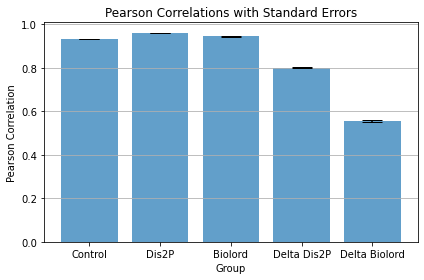

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Initialize lists to store Pearson correlations
pearson_control = []
pearson_dis2p = []
pearson_biolord = []
pearson_delta_dis2p = []
pearson_delta_biolord = []

# Run the simulation for 200 iterations
for _ in range(200):
    true = np.random.normal(loc=np.random.randint(5, 10, 100))
    dis2p = true + np.random.normal(loc=0, scale=0.5, size=100)
    
    control = true + np.random.normal(loc=0, scale=0.5, size=100)
    control[np.random.randint(0, len(control), size=10)] += 1.5
    
    biolord = control + (true - control) * 0.5 + np.random.normal(loc=0, scale=0.5, size=100)
    
    # Calculate Pearson correlations
    pearson_control.append(pearsonr(control, true)[0])
    pearson_dis2p.append(pearsonr(dis2p, true)[0])
    pearson_biolord.append(pearsonr(biolord, true)[0])
    
    # Calculate delta values
    delta_dis2p = dis2p - control
    delta_biolord = biolord - control
    delta_true = true - control
    
    # Calculate Pearson correlations for delta values
    pearson_delta_dis2p.append(pearsonr(delta_dis2p, delta_true)[0])
    pearson_delta_biolord.append(pearsonr(delta_biolord, delta_true)[0])

# Calculate means and standard errors
means = [
    np.mean(pearson_control),
    np.mean(pearson_dis2p),
    np.mean(pearson_biolord),
    np.mean(pearson_delta_dis2p),
    np.mean(pearson_delta_biolord)
]
std_errors = [
    np.std(pearson_control) / np.sqrt(200),
    np.std(pearson_dis2p) / np.sqrt(200),
    np.std(pearson_biolord) / np.sqrt(200),
    np.std(pearson_delta_dis2p) / np.sqrt(200),
    np.std(pearson_delta_biolord) / np.sqrt(200)
]

# Plotting the bar plot
labels = ['Control', 'Dis2P', 'Biolord', 'Delta Dis2P', 'Delta Biolord']
x_pos = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=std_errors, align='center', alpha=0.7, ecolor='black', capsize=10)
ax.set_xlabel('Group')
ax.set_ylabel('Pearson Correlation')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Pearson Correlations with Standard Errors')
ax.yaxis.grid(True)

# Save and display the plot
plt.tight_layout()
plt.savefig('pearson_correlations.png')
plt.show()


[0.9604195355576439, 0.9604195355576438, 0.9469390810636511, -0.0023582217440450337, 0.3744841767179089]


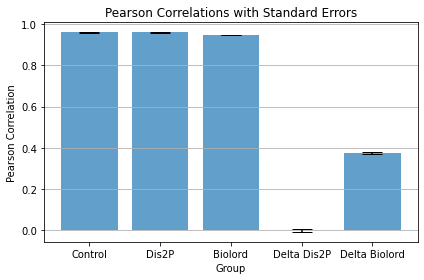

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Initialize lists to store Pearson correlations
pearson_control = []
pearson_dis2p = []
pearson_biolord = []
pearson_delta_dis2p = []
pearson_delta_biolord = []

# Run the simulation for 200 iterations
for _ in range(200):
    true = np.random.normal(loc=np.random.randint(5, 10, 100))
    dis2p = true + np.random.normal(loc=0, scale=0.5, size=100)
    
    control = [1+i for i in dis2p]
   
    biolord = control + (true - control) * 0.4 + np.random.normal(loc=0, scale=0.5, size=100)
    
    # Calculate Pearson correlations
    pearson_control.append(pearsonr(control, true)[0])
    pearson_dis2p.append(pearsonr(dis2p, true)[0])
    pearson_biolord.append(pearsonr(biolord, true)[0])
    
    # Calculate delta values
    delta_dis2p = dis2p - control
    delta_biolord = biolord - control
    delta_true = true - control
    
    # Calculate Pearson correlations for delta values
    pearson_delta_dis2p.append(pearsonr(delta_dis2p, delta_true)[0])
    pearson_delta_biolord.append(pearsonr(delta_biolord, delta_true)[0])

# Calculate means and standard errors
means = [
    np.mean(pearson_control),
    np.mean(pearson_dis2p),
    np.mean(pearson_biolord),
    np.mean(pearson_delta_dis2p),
    np.mean(pearson_delta_biolord)
]
std_errors = [
    np.std(pearson_control) / np.sqrt(200),
    np.std(pearson_dis2p) / np.sqrt(200),
    np.std(pearson_biolord) / np.sqrt(200),
    np.std(pearson_delta_dis2p) / np.sqrt(200),
    np.std(pearson_delta_biolord) / np.sqrt(200)
]

# Plotting the bar plot
labels = ['Control', 'Dis2P', 'Biolord', 'Delta Dis2P', 'Delta Biolord']
x_pos = np.arange(len(labels))
print(means)
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=std_errors, align='center', alpha=0.7, ecolor='black', capsize=10)
ax.set_xlabel('Group')
ax.set_ylabel('Pearson Correlation')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Pearson Correlations with Standard Errors')
ax.yaxis.grid(True)

# Save and display the plot
plt.tight_layout()
plt.savefig('pearson_correlations.png')
plt.show()

[0.9799369311388003, 0.9605945515394783, 0.9549448302553403, 0.0002304350802417636, 0.2767427019137282]


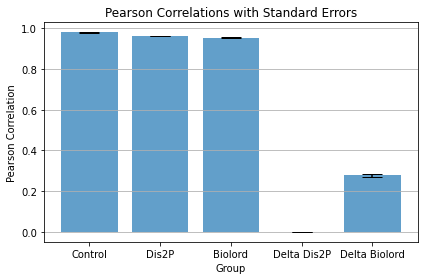

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Initialize lists to store Pearson correlations
pearson_control = []
pearson_dis2p = []
pearson_biolord = []
pearson_delta_dis2p = []
pearson_delta_biolord = []

# Run the simulation for 200 iterations
for _ in range(200):
    true = np.random.normal(loc=np.random.randint(5, 10, 100))
    dis2p = true + np.random.normal(loc=0, scale=0.5, size=100)
    
    control = true.copy() 
    control[50:] = dis2p[50:]
    #control = [1+i for i in true ] + np.random.normal(loc=0, scale=0.5, size=100)
   
    biolord = control + (true - control)*0.4 + np.random.normal(loc=0, scale=0.5, size=100)
    
    # Calculate Pearson correlations
    pearson_control.append(pearsonr(control, true)[0])
    pearson_dis2p.append(pearsonr(dis2p, true)[0])
    pearson_biolord.append(pearsonr(biolord, true)[0])
    
    # Calculate delta values
    delta_dis2p = dis2p - control
    delta_biolord = biolord - control
    delta_true = true - control
    
    # Calculate Pearson correlations for delta values
    pearson_delta_dis2p.append(pearsonr(delta_dis2p, delta_true)[0])
    pearson_delta_biolord.append(pearsonr(delta_biolord, delta_true)[0])

# Calculate means and standard errors
means = [
    np.mean(pearson_control),
    np.mean(pearson_dis2p),
    np.mean(pearson_biolord),
    np.mean(pearson_delta_dis2p),
    np.mean(pearson_delta_biolord)
]
std_errors = [
    np.std(pearson_control) / np.sqrt(200),
    np.std(pearson_dis2p) / np.sqrt(200),
    np.std(pearson_biolord) / np.sqrt(200),
    np.std(pearson_delta_dis2p) / np.sqrt(200),
    np.std(pearson_delta_biolord) / np.sqrt(200)
]

# Plotting the bar plot
labels = ['Control', 'Dis2P', 'Biolord', 'Delta Dis2P', 'Delta Biolord']
x_pos = np.arange(len(labels))
print(means)
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=std_errors, align='center', alpha=0.7, ecolor='black', capsize=10)
ax.set_xlabel('Group')
ax.set_ylabel('Pearson Correlation')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Pearson Correlations with Standard Errors')
ax.yaxis.grid(True)

# Save and display the plot
plt.tight_layout()
plt.savefig('pearson_correlations.png')
plt.show()